# Gemini API: Authentication Quickstart


---


The Gemini API uses API keys for authentication. This notebook walks you through creating an API key, and using it with the Python SDK

**Create an API key**

You can create your API key using Google AI Studio with a single click.
Remember to treat your API key like a password. Do not accidentally save it in a notebook or source file you later commit to GitHub. This notebook shows you two ways you can securely store your API key.

If you are using Google Colab, it is recommended to store your key in Colab Secrets.





# Add your key to Colab Secrets
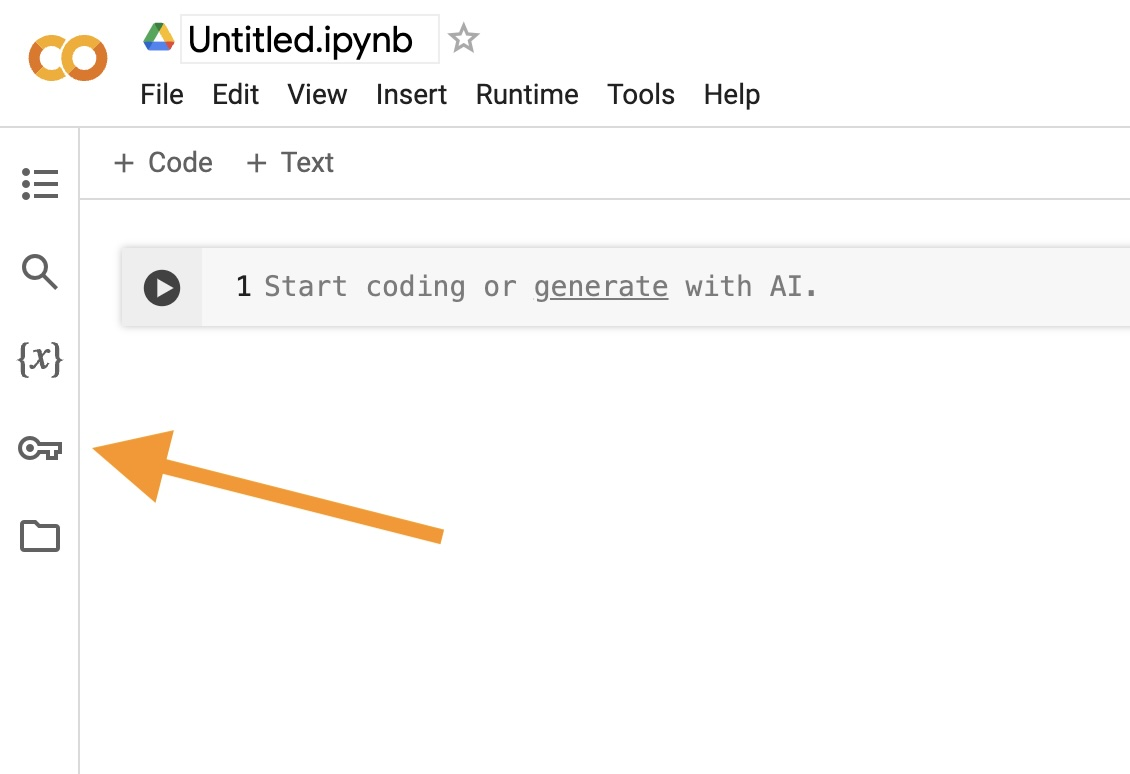


Add your API key to the Colab Secrets manager to securely store it.

1- Open your Google Colab notebook and click on the 🔑 Secrets tab in the left panel.
2- Create a new secret with the name GOOGLE_API_KEY.

3- Copy/paste your API key into the Value input box of GOOGLE_API_KEY.

4- Toggle the button on the left to allow notebook access to the secret.



In [ ]:
!pip install -U -q google-generativeai


In [ ]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for model in genai.list_models():
  print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash
models/gemini-1.5-flash-001-tuning
models/embedding-001
models/text-embedding-004
models/aqa


In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
prompt = "what is the capital of the iraq?"

In [ ]:
response = model.generate_content(prompt)

In [ ]:
response.text

'Baghdad'

# About tokens

LLMs break up their input and produce their output at a granularity that is smaller than a word, but larger than a single character or code-point.

These tokens can be single characters, like z, or whole words, like the. Long words may be broken up into several tokens. The set of all tokens used by the model is called the vocabulary, and the process of breaking down text into tokens is called tokenization.

For Gemini models, a token is equivalent to about 4 characters. 100 tokens are about 60-80 English words.

When billing is enabled, the price of a paid request is controlled by the number of input and output tokens, so knowing how to count your tokens is important.

In [ ]:
model.count_tokens("The quick brown fox jumps over the lazy dog.")


total_tokens: 10


# Gemini API Embeddings

The Gemini API generates state-of-the-art text embeddings. An embedding is a list of floating point numbers that represent the meaning of a word, sentence, or paragraph. You can use embeddings in many downstream applications like document search.

In [ ]:

text = "Hello world"
result = genai.embed_content(model="models/text-embedding-004", content=text)

# Print just a part of the embedding to keep the output manageable
print(str(result['embedding'])[:50], '... TRIMMED]')

[0.013168523, -0.008711934, -0.046782676, 0.000699 ... TRIMMED]


# Candidates and Filters

In [ ]:
prompt = "what kind of person is tall person"

In [ ]:
response = model.generate_content(prompt)

In [ ]:
response.text

'**General Characteristics:**\n\n* **Physically Tall:** Obvious characteristic, typically above average in height.\n* **Noticeable Presence:** Their height makes them stand out in crowds and attracts attention.\n\n**Personality Traits:**\n\n* **Confident:** Tall people often develop confidence due to positive experiences and social acceptance.\n* **Extroverted:** Their physical presence encourages them to be more outgoing and approachable.\n* **Optimistic:** May have a positive outlook on life based on their perceived advantages.\n\n**Advantages and Challenges:**\n\n**Advantages:**\n\n* **Physical Advantages:** Reach for higher objects, have longer strides for faster running, and may excel in certain sports (e.g., basketball).\n* **Social Advantages:** May be seen as more dominant, authoritative, and capable.\n* **Enhanced Visibility:** Their height makes them easy to spot and can be an advantage in certain situations (e.g., finding lost items, job interviews).\n\n**Challenges:**\n\n* 

In [ ]:
response.candidates

[content {
  parts {
    text: "**General Characteristics:**\n\n* **Physically Tall:** Obvious characteristic, typically above average in height.\n* **Noticeable Presence:** Their height makes them stand out in crowds and attracts attention.\n\n**Personality Traits:**\n\n* **Confident:** Tall people often develop confidence due to positive experiences and social acceptance.\n* **Extroverted:** Their physical presence encourages them to be more outgoing and approachable.\n* **Optimistic:** May have a positive outlook on life based on their perceived advantages.\n\n**Advantages and Challenges:**\n\n**Advantages:**\n\n* **Physical Advantages:** Reach for higher objects, have longer strides for faster running, and may excel in certain sports (e.g., basketball).\n* **Social Advantages:** May be seen as more dominant, authoritative, and capable.\n* **Enhanced Visibility:** Their height makes them easy to spot and can be an advantage in certain situations (e.g., finding lost items, job interv

# Chat History

In [ ]:
chat=model.start_chat()

In [ ]:
type(chat)

google.generativeai.generative_models.ChatSession

In [ ]:
response = chat.send_message("Help me plan some activities to visit paris")

In [ ]:
print(response.text)

**Day 1:**

* **Morning:** Visit the iconic **Eiffel Tower**, ascend to the summit for breathtaking city views.
* **Afternoon:** Stroll through the **Louvre Museum**, home to masterpieces like the Mona Lisa and Venus de Milo.
* **Evening:** Take a romantic cruise along the **Seine River**, menikmati pemandangan kota yang memukau.

**Day 2:**

* **Morning:** Explore the **Arc de Triomphe**, commemorating France's military victories. Climb to the top for panoramic city views.
* **Afternoon:** Visit the **Notre Dame Cathedral**, a stunning Gothic masterpiece with its iconic flying buttresses.
* **Evening:** Have dinner at a charming restaurant in the picturesque **Marais district**.

**Day 3:**

* **Morning:** Discover the **Musee d'Orsay**, renowned for its Impressionist and Post-Impressionist art collections.
* **Afternoon:** Stroll through the **Tuileries Garden**, a beautiful park located between the Louvre and Place de la Concorde.
* **Evening:** Attend a performance at the **Opera G

In [ ]:
response = chat.send_message("give me details about last point")

In [ ]:
print(response.text)

**Champs-Élysées** is a wide and iconic boulevard in Paris, France, known for its luxury stores, cafés, and restaurants. It stretches from the Place de la Concorde to the Arc de Triomphe, and is considered one of the most famous streets in the world.

**Things to do and see on the Champs-Élysées:**

* **Go shopping:** The Champs-Élysées is home to a wide range of luxury stores, including flagship boutiques from brands like Louis Vuitton, Chanel, and Dior. There are also many mid-range and affordable stores, as well as souvenir shops.
* **Have a coffee or meal:** There are many cafés and restaurants along the Champs-Élysées, offering everything from quick bites to fine dining. You can enjoy a coffee and pastry at a sidewalk café, or indulge in a gourmet meal at a Michelin-starred restaurant.
* **Visit the Arc de Triomphe:** The Arc de Triomphe is a triumphal arch located at the western end of the Champs-Élysées. You can climb to the top of the arch for panoramic views of the city.
* **S

In [ ]:
chat.history

[parts {
   text: "Help me plan some activities to visit paris"
 }
 role: "user",
 parts {
   text: "**Day 1:**\n\n* **Morning:** Visit the iconic **Eiffel Tower**, ascend to the summit for breathtaking city views.\n* **Afternoon:** Stroll through the **Louvre Museum**, home to masterpieces like the Mona Lisa and Venus de Milo.\n* **Evening:** Take a romantic cruise along the **Seine River**, menikmati pemandangan kota yang memukau.\n\n**Day 2:**\n\n* **Morning:** Explore the **Arc de Triomphe**, commemorating France\'s military victories. Climb to the top for panoramic city views.\n* **Afternoon:** Visit the **Notre Dame Cathedral**, a stunning Gothic masterpiece with its iconic flying buttresses.\n* **Evening:** Have dinner at a charming restaurant in the picturesque **Marais district**.\n\n**Day 3:**\n\n* **Morning:** Discover the **Musee d\'Orsay**, renowned for its Impressionist and Post-Impressionist art collections.\n* **Afternoon:** Stroll through the **Tuileries Garden**, a be

# Configuration parameters
## The Generation Configuration Object

You can easily supply arguments to a geneartion configuration object:
*   Temperature
*   Max Output Tokens
*   Top k and Top P
*   Stop Sequences
*   Candidate Count


In [ ]:
config = genai.types.GenerationConfig(temperature=1.0,max_output_tokens=2000,candidate_count=1)

In [ ]:
def get_response(prompt, generation_config={}):
    response = model.generate_content(contents=prompt,generation_config=generation_config)
    return response

In [ ]:
result = get_response("Tell me a story about the Moon")
print(result.text)

In the celestial tapestry, where celestial bodies dance their eternal waltz, there exists a celestial entity both alluring and enigmatic – the Moon. Bathed in an ethereal glow, it has been a silent observer of countless earthly events, its presence casting a spell on poets, artists, and dreamers alike.

Once, when the world was still a young and volatile place, a cataclysmic event occurred. A celestial wanderer, a rogue planet known as Theia, collided with the Earth. The impact sent debris hurtling into space, and from this cosmic chaos, the Moon was born.

As eons passed, the Moon became the Earth's constant companion, orbiting our planet like a loyal guardian. Its gravitational pull gently shaped the tides, regulating the life cycle of countless marine creatures. But there was more to the Moon than met the eye.

Ancient civilizations around the world revered the Moon as a divine entity. In Hellenic mythology, it was personified as the goddess Selene, driving her silver chariot across

In [ ]:
result = get_response("Tell me a story about the Moon", generation_config= config)

In [ ]:
result.text

"In the ethereal expanse, where stars shimmered like celestial jewels, there existed a realm veiled in silvery luminescence – the Moon. Legends spoke of its enigmatic origins, whispered through the ages by stargazers and dreamers alike.\n\nOnce, it was believed that the Moon was a wayward piece of the Sun, torn asunder in a cosmic dance. Others whispered of a titanic collision, where a celestial wanderer crashed into Earth, its fragments coalescing into the celestial orb.\n\nYet, a more profound tale unfolded beneath the Moon's enigmatic surface. It was said that within its core resided the fragments of a lost civilization, a race of beings who had once reached the pinnacle of knowledge and enlightenment.\n\nAs the Earth spun on its axis, casting the Moon into darkness, a legend emerged. It was said that the Moon harbored a secret society, the Children of Luna. These beings possessed ancient wisdom and secrets passed down through generations, hidden from the prying eyes of the mortals 

In [ ]:
result.candidates[0].content.parts[0].text

"In the ethereal expanse, where stars shimmered like celestial jewels, there existed a realm veiled in silvery luminescence – the Moon. Legends spoke of its enigmatic origins, whispered through the ages by stargazers and dreamers alike.\n\nOnce, it was believed that the Moon was a wayward piece of the Sun, torn asunder in a cosmic dance. Others whispered of a titanic collision, where a celestial wanderer crashed into Earth, its fragments coalescing into the celestial orb.\n\nYet, a more profound tale unfolded beneath the Moon's enigmatic surface. It was said that within its core resided the fragments of a lost civilization, a race of beings who had once reached the pinnacle of knowledge and enlightenment.\n\nAs the Earth spun on its axis, casting the Moon into darkness, a legend emerged. It was said that the Moon harbored a secret society, the Children of Luna. These beings possessed ancient wisdom and secrets passed down through generations, hidden from the prying eyes of the mortals 

## Gemini LLM Configuration Parameters

### Temperature
In Gemini LLM, the `temperature` parameter plays a crucial role in the response generation process. It's instrumental during the sampling phase, particularly when `top_p` and `top_k` parameters are in effect. Essentially, `temperature` influences the randomness in token selection:

- **Low temperatures** are optimal for prompts necessitating deterministic, concise, and less creative responses.
- **High temperatures** foster diverse and creative outcomes, enhancing the model's response variability.

    - **Range**: `0.0 - 1.0`
    - **Default Settings**:
        - **gemini-pro**: `0.9`
        - **gemini-pro-vision**: `0.4`

In [ ]:
config = genai.types.GenerationConfig(temperature=0.0)
result = get_response("Tell me about the United States",generation_config=config)
print(result.text)

**Geography:**

* Located in North America, bordered by Canada to the north and Mexico to the south
* Consists of 50 states, the District of Columbia, and several territories
* Total area: 9.83 million square kilometers (3.8 million square miles)
* Diverse landscapes, including mountains, deserts, forests, and coastlines

**Demographics:**

* Population: Approximately 332 million (2023 estimate)
* Ethnic diversity: White (76%), Black or African American (13%), Hispanic or Latino (19%), Asian (6%), Native American (1%)
* Official language: English

**Government:**

* Federal republic with a democratic system
* Three branches of government: legislative (Congress), executive (President), and judicial (Supreme Court)
* Capital: Washington, D.C.

**Economy:**

* World's largest economy by nominal GDP
* Highly developed, with a diverse range of industries
* Major sectors include technology, finance, healthcare, and manufacturing
* Currency: US dollar

**Culture:**

* Rich and diverse, influe

In [ ]:
config = genai.types.GenerationConfig(temperature=1.0)
result = get_response("Tell me about the United States",generation_config=config)
print(result.text)

**Geography and Population**

* Located in North America, bordered by Canada to the north, Mexico to the south, and the Atlantic and Pacific Oceans to the east and west, respectively.
* Covers an area of approximately 9.8 million square kilometers (3.8 million square miles).
* Population of over 332 million (2023 estimate).

**History**

* Founded in 1776 with the Declaration of Independence, separating from British colonial rule.
* Expanded through westward settlement and annexation in the 19th century.
* Played a major role in both World Wars and emerged as a global superpower.

**Government and Politics**

* Federal republic with a three-branch government:
    * Legislative branch: Congress (Senate and House of Representatives)
    * Executive branch: President
    * Judicial branch: Supreme Court
* Two-party political system with the Democratic and Republican parties being the major contenders.

**Economy**

* World's largest economy, with a GDP of over $26 trillion (2023 estimate)

### max_output_tokens
The `max_output_tokens` parameter defines the upper limit of tokens generated in a response. Notably, a token approximates four characters, translating to about 60-80 words for 100 tokens. Adjust this parameter based on the desired response length:

- **Lower values** lead to shorter responses.
- **Higher values** enable more extensive responses.

    - **Ranges**:
        - **gemini-pro**: `1-8192` (default: `8192`)
        - **gemini-pro-vision**: `1-2048` (default: `2048`)

In [ ]:
config = genai.types.GenerationConfig(max_output_tokens=500)
result = get_response("Tell me about the United States",generation_config=config)
print(result.text)

**United States of America (USA)**

**Geography:**

* Located in North America, bordered by Canada to the north and Mexico to the south.
* Total area: 9,833,517 square kilometers (3,796,742 square miles)
* Diverse landscape: mountains, deserts, forests, grasslands, coastlines, and rivers.

**Population:**

* Population: 333 million (2023 estimate)
* Diverse population: descendants of immigrants from all over the world.
* Major ethnic groups: White (60.1%), Black (13.6%), Hispanic or Latino (19.5%), Asian (6.0%).

**Government:**

* Federal republic with a strong presidential system.
* Three branches of government: Executive (President), Legislative (Congress), and Judicial (Supreme Court).
* System of checks and balances to prevent any one branch from gaining too much power.

**Economy:**

* World's largest economy by nominal GDP ($26.49 trillion in 2022).
* Highly developed, capitalist economy.
* Major industries: technology, finance, manufacturing, healthcare, and retail.

**Culture:

### top_k
`top_k` parameter influences the model's token selection strategy for generating outputs. It's a measure of how many of the most probable tokens are considered at each step:

- A **top_k of 1** implies a deterministic approach, choosing the most probable token.
- Higher **top_k values** introduce diversity, selecting from a broader range of probable tokens based on the set `temperature`.

    - **Range**: `1-40`
    - **Default Settings**:
        - **gemini-pro-vision**: `32`
        - **gemini-pro**: Not specified (none)

In [ ]:
config = genai.types.GenerationConfig(top_k=1)
result = get_response("Tell me about the United States",generation_config=config)
print(result.text)

**United States of America**

**General Information**

* **Capital:** Washington, D.C.
* **Official Language:** English
* **Government:** Constitutional republic with a federal system
* **President:** Joe Biden
* **Population:** 332.4 million (as of 2022)
* **Area:** 9.83 million square kilometers (3.8 million square miles)
* **National Anthem:** "The Star-Spangled Banner"

**History**

* Founded on July 4, 1776, after a revolution against British rule
* Became an independent nation with the Declaration of Independence
* Expanded westward through settlement, land acquisition, and the admission of new states

**Geography**

* Bordered by Canada to the north, Mexico to the south, and the Atlantic and Pacific Oceans to the east and west, respectively
* Diverse geography, including mountains, prairies, forests, deserts, and coastlines
* Climate ranges from tropical to polar

**Economy**

* World's largest economy by GDP
* Highly developed mixed economy with a strong private sector
* Major 

In [ ]:
config = genai.types.GenerationConfig(top_k=40)
result = get_response("Tell me about the United States",generation_config=config)
print(result.text)

**Geography:**

* Located in North America, bordered by Canada, Mexico, the Pacific Ocean, and the Atlantic Ocean.
* 50 states and a federal district (Washington, D.C.)
* Capital: Washington, D.C.
* Area: 3.797 million sq mi (9.831 million sq km)

**Population:**

* Population: 335 million (2023 est.)
* Diverse population from all over the world
* Large urban centers: New York City, Los Angeles, Chicago, Houston, Philadelphia

**Economy:**

* World's largest economy
* GDP per capita: $69,288 (2022 est.)
* Strong sectors: technology, healthcare, finance, manufacturing, agriculture
* Currency: US dollar

**Government:**

* Federal republic with three branches: executive, legislative, and judicial
* President: Joe Biden
* Congress: House of Representatives and Senate
* Supreme Court with lifetime appointments

**Culture:**

* Rich and diverse culture with influences from various immigrant groups
* Strong emphasis on individualism and freedom
* Known for its popular music, film, and televi

### top_p
The `top_p` parameter, akin to `top_k`, modifies the token selection process. It considers tokens from the most to least probable, cumulatively, until their probabilities match the `top_p` value. The model then selects the next token within this subset, guided by the `temperature` parameter:

- **Lower `top_p` values** lead to more predictable responses.
- **Higher `top_p` values** permit a wider array of potential responses, injecting randomness.

    - **Range**: `0.0 - 1.0`
    - **Default**: `1.0`

In [ ]:
config = genai.types.GenerationConfig(top_p=0)
result = get_response("Tell me about the United States",generation_config=config)
print(result.text)

**Geography:**

* Located in North America, bordered by Canada to the north and Mexico to the south
* Consists of 50 states, the District of Columbia, and several territories
* Total area: 9.83 million square kilometers (3.8 million square miles)
* Diverse landscapes, including mountains, deserts, forests, and coastlines

**Demographics:**

* Population: Approximately 332 million (2023 estimate)
* Ethnic diversity: White (76%), Black or African American (13%), Hispanic or Latino (19%), Asian (6%), Native American (1%)
* Official language: English

**Government:**

* Federal republic with a democratic system
* Three branches of government: legislative (Congress), executive (President), and judicial (Supreme Court)
* Capital: Washington, D.C.

**Economy:**

* World's largest economy by nominal GDP
* Highly developed, with a diverse range of industries
* Major sectors include technology, finance, healthcare, and manufacturing
* Currency: US dollar

**Culture:**

* Rich and diverse, influe

In [ ]:
config = genai.types.GenerationConfig(top_p=1)
result = get_response("Tell me about the United States",generation_config=config)
print(result.text)

**Geography:**

* Located in North America
* Borders Canada to the north, Mexico to the south, and the Atlantic, Pacific, and Arctic oceans
* Area: 9.83 million square kilometers (3.80 million square miles)
* Diverse landscapes, including mountains, deserts, forests, and coastlines

**History:**

* Originally inhabited by Native American tribes
* Colonized by European powers (France, Britain, Spain)
* Declared independence as the United States of America in 1776
* Underwent significant expansion westward in the 19th century
* Became a global superpower in the 20th century

**Government:**

* Federal republic with three branches:
    * Executive: President and executive branch
    * Legislative: Congress (Senate and House of Representatives)
    * Judicial: Supreme Court and federal judiciary
* Constitution is the supreme law of the land

**Demographics:**

* Population: Approximately 335 million
* Ethnic diversity: Home to a wide range of ethnic groups and cultures
* Majority speaks En

### candidate_count
The `candidate_count` parameter determines the quantity of different response variations the model generates. For Gemini LLM, this value is fixed:

- **Required Value**: `1`

**IMPORTANT NOTE: AT THIS TIME, YOU ARE ONLY ALLOWED ONE CANDIDATE, BUT CHECK THE OFFICIAL DOCS FOR AN UPDATE IN THE FUTURE!**

In [ ]:
config = genai.types.GenerationConfig(candidate_count=1)
result = get_response("Give me 3 top facts about the United States",generation_config=config)

In [ ]:
print(result.text)

1. **World's Largest Economy:** The United States has the largest economy in the world, with a GDP of approximately $26 trillion in 2023.

2. **Melting Pot of Cultures:** As a nation of immigrants, the United States is home to people from all over the world. This diversity has created a vibrant and multicultural society.

3. **National Parks and Natural Wonders:** The United States boasts an extensive network of national parks and protected areas, including iconic landmarks such as Yosemite Valley, the Grand Canyon, and Yellowstone National Park.


### stop_sequences
`stop_sequences` is a feature allowing the specification of strings that prompt the model to cease text generation. The response is truncated at the first occurrence of any listed string. This feature is sensitive to the case of the strings:

- **Usage Example**: If "Str" and "reverse" are in `stop_sequences`, the model stops generating text at their first appearance.
- **Limitation**: A maximum of 5 strings can be listed in `stop_sequences`.

In [ ]:
config = genai.types.GenerationConfig(stop_sequences=['x','X'])
result = get_response("Give me a list of all the letters in the alphabet",generation_config=config)
print(result.text)

A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, 


In [ ]:
config = genai.types.GenerationConfig(stop_sequences=['Sincerely'])
result = get_response("Write a customer support email thanking the customer for reaching out. End it with 'Sincerely'",generation_config=config)
print(result.text)

Dear [Customer Name],

Thank you so much for reaching out to us.

We appreciate you taking the time to connect with us and provide your valuable feedback. Your concerns are important to us, and we're committed to addressing them promptly and effectively.

Our team is currently reviewing your message and will respond as soon as possible. In the meantime, please feel free to contact us if you have any further questions or need additional support.


